In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!rm -rf /content/sample_data

In [3]:
!git clone https://github.com/jeya-maria-jose/Medical-Transformer

Cloning into 'Medical-Transformer'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 136 (delta 53), reused 80 (delta 16), pack-reused 0
Receiving objects: 100% (136/136), 469.94 KiB | 21.36 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [4]:
from xml.dom import minidom

# parse an xml file by name
mydoc = minidom.parse('/content/gdrive/MyDrive/Kaggle/original-monuseg-data-unet-320-epoch/monuseg-2018-original/MoNuSegTrainingData/MoNuSegTrainingData/Annotations/TCGA-38-6178-01Z-00-DX1.xml')

Regions = mydoc.getElementsByTagName('Region')

In [5]:
import numpy as np
xy=[]
for index,region in enumerate(Regions):
  vertices=region.getElementsByTagName('Vertex')
  xy.append([(float(vertex.getAttribute('X')),float(vertex.getAttribute('Y'))) for i,vertex in enumerate(vertices)])
    

In [6]:
from PIL import Image,ImageDraw
img=np.array(Image.open('/content/gdrive/MyDrive/Kaggle/original-monuseg-data-unet-320-epoch/monuseg-2018-original/MoNuSegTrainingData/MoNuSegTrainingData/Tissue Images/TCGA-38-6178-01Z-00-DX1.tif'))
img.shape

(1000, 1000, 3)

In [7]:
img = Image.new('L', (1000, 1000), 0)
for i in xy:
  ImageDraw.Draw(img).polygon(i, outline=1, fill=1)

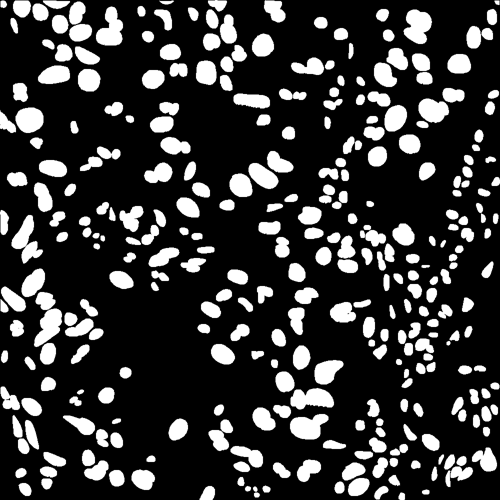

In [8]:
Image.fromarray(255*np.array(img)).resize((500,500))#.save('mask.png')

In [20]:
import os
for root,dir,files in os.walk('/content/MoNuSegTrainingData'):
  print(root)
  print(dir)
  print(files)
  print('**************************************************')

In [31]:
from shutil import copyfile
import matplotlib.pyplot as plt
%matplotlib inline

def get_polygons(x):
  mydoc = minidom.parse(x)
  Regions = mydoc.getElementsByTagName('Region')
  xy=[]
  for index,region in enumerate(Regions):
    vertices=region.getElementsByTagName('Vertex')
    xy.append([(float(vertex.getAttribute('X')),float(vertex.getAttribute('Y'))) for i,vertex in enumerate(vertices)])
  return xy

def get_masks(x):
  xy=get_polygons(x)
  img = Image.new('L', (1000, 1000), 0)
  for i in xy:
    ImageDraw.Draw(img).polygon(i, outline=1, fill=1)
  return Image.fromarray(255*np.array(img))



def save_datapoint(x,folder,name):
  label=get_masks('/content/gdrive/MyDrive/Kaggle/original-monuseg-data-unet-320-epoch/monuseg-2018-original/MoNuSegTrainingData/MoNuSegTrainingData/Annotations/'+x)
  image=Image.open('/content/gdrive/MyDrive/Kaggle/original-monuseg-data-unet-320-epoch/monuseg-2018-original/MoNuSegTrainingData/MoNuSegTrainingData/Tissue Images/'+x.replace('xml','tif'))
  image=image.resize((256,256))
  label=label.resize((256,256))
  
  plt.subplot(1,2,1)
  plt.imshow(image,interpolation='none')
  plt.subplot(1,2,2)
  plt.imshow(label,cmap='gray',interpolation='none')
  plt.show()
  print(np.array(image).shape,' ',np.array(label).shape)
  image.save(folder+'/img/'+name.zfill(4)+'.png')
  label.save(folder+'/labelcol/'+name.zfill(4)+'.png')

In [32]:
!rm -rf test\ folder
!rm -rf train\ folder\ folder
!rm -rf validation\ folder

In [47]:
import random
import itertools

for i,j in itertools.product(['/content/train_folder/',
                              '/content/validation_folder/',
                              '/content/test_folder/'],
                             ['img',
                              'labelcol']):
  os.makedirs(i+j,exist_ok=True)
random.random()



v,t = 0,0
_, _, filenames = next(os.walk('/content/gdrive/MyDrive/Kaggle/original-monuseg-data-unet-320-epoch/monuseg-2018-original/MoNuSegTrainingData/MoNuSegTrainingData/Annotations'))
for i in filenames:
  if random.random()<=0.167:
    v+=1
    save_datapoint(i,'/content/validation_folder',str(v))
  else:
    t+=1
    save_datapoint(i,'/content/train_folder',str(t))

FileNotFoundError: ignored

In [24]:
import glob
train_images = glob.glob('/content/train_folder/*')
test_images = glob.glob('/content/test-folder/*')
validation_images = glob.glob('/content/validation_folder/*')


In [ ]:
print (train_images)
print (test_images)
print (validation_images)

['/content/train folder/labelcol', '/content/train folder/img']
['/content/test folder/labelcol', '/content/test folder/img']
['/content/validation folder/labelcol', '/content/validation folder/img']


In [45]:
!zip -r /content/test_folder.zip /content/test_folder

  adding: content/test_folder/ (stored 0%)
  adding: content/test_folder/labelcol/ (stored 0%)
  adding: content/test_folder/labelcol/0008.png (stored 0%)
  adding: content/test_folder/labelcol/0007.png (deflated 0%)
  adding: content/test_folder/labelcol/0002.png (deflated 0%)
  adding: content/test_folder/labelcol/0003.png (stored 0%)
  adding: content/test_folder/labelcol/0006.png (stored 0%)
  adding: content/test_folder/labelcol/0005.png (deflated 0%)
  adding: content/test_folder/labelcol/0001.png (deflated 0%)
  adding: content/test_folder/labelcol/0004.png (stored 0%)
  adding: content/test_folder/img/ (stored 0%)
  adding: content/test_folder/img/0008.png (deflated 0%)
  adding: content/test_folder/img/0007.png (deflated 0%)
  adding: content/test_folder/img/0002.png (deflated 0%)
  adding: content/test_folder/img/0003.png (deflated 0%)
  adding: content/test_folder/img/0006.png (deflated 0%)
  adding: content/test_folder/img/0005.png (deflated 0%)
  adding: content/test_folde

In [46]:
!zip -r /content/train_folder.zip /content/train_folder

  adding: content/train_folder/ (stored 0%)
  adding: content/train_folder/labelcol/ (stored 0%)
  adding: content/train_folder/labelcol/0013.png (deflated 0%)
  adding: content/train_folder/labelcol/0008.png (stored 0%)
  adding: content/train_folder/labelcol/0007.png (deflated 0%)
  adding: content/train_folder/labelcol/0002.png (deflated 0%)
  adding: content/train_folder/labelcol/0015.png (deflated 0%)
  adding: content/train_folder/labelcol/0003.png (stored 0%)
  adding: content/train_folder/labelcol/0011.png (deflated 0%)
  adding: content/train_folder/labelcol/0006.png (deflated 0%)
  adding: content/train_folder/labelcol/0005.png (deflated 0%)
  adding: content/train_folder/labelcol/0009.png (stored 0%)
  adding: content/train_folder/labelcol/0022.png (deflated 0%)
  adding: content/train_folder/labelcol/0019.png (stored 0%)
  adding: content/train_folder/labelcol/0023.png (deflated 0%)
  adding: content/train_folder/labelcol/0010.png (stored 0%)
  adding: content/train_folder/

In [ ]:
!zip -r /content/validation_folder.zip /content/validation_folder

  adding: content/validation_folder/ (stored 0%)
  adding: content/validation_folder/labelcol/ (stored 0%)
  adding: content/validation_folder/labelcol/0002.png (stored 0%)
  adding: content/validation_folder/labelcol/0003.png (stored 0%)
  adding: content/validation_folder/labelcol/0005.png (deflated 0%)
  adding: content/validation_folder/labelcol/0001.png (deflated 0%)
  adding: content/validation_folder/labelcol/0004.png (stored 0%)
  adding: content/validation_folder/img/ (stored 0%)
  adding: content/validation_folder/img/0002.png (deflated 0%)
  adding: content/validation_folder/img/0003.png (deflated 0%)
  adding: content/validation_folder/img/0005.png (deflated 0%)
  adding: content/validation_folder/img/0001.png (deflated 0%)
  adding: content/validation_folder/img/0004.png (deflated 0%)


In [ ]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf


warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed

In [ ]:
# Define IoU metric
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)

In [ ]:
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 3
# Build U-Net model
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[mean_iou])
model.summary()

In [ ]:
TRAIN_PATH_MASKS = glob.glob('/content/train folder/labelcol/*')
TRAIN_PATH_IMAGES = glob.glob('/content/train folder/img/*')
TEST_PATH_IMAGES = glob.glob('/content/test folder/img/*')
TEST_PATH_MASKS = glob.glob('/content/test folder/labelcol/*')

In [ ]:
# Get and resize train images and masks
X_train = np.zeros((len(TRAIN_PATH_IMAGES), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(TRAIN_PATH_MASKS), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
# Get test images and masks
X_test = np.zeros((len(TEST_PATH_IMAGES), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((len(TEST_PATH_MASKS), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
# Read train images
print ('TRAIN_PATH_IMAGES: ', TRAIN_PATH_IMAGES)
for n, fn_images in enumerate(TRAIN_PATH_IMAGES):
    img = imread(fn_images)[:,:,:IMG_CHANNELS]
    #img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    
# Read train masks
print ('TRAIN_PATH_MASKS: ', TRAIN_PATH_MASKS)
for n, fn_masks in enumerate(TRAIN_PATH_MASKS):
    mask_ = imread(fn_masks)
    mask_ = np.expand_dims(mask_, axis=-1)
    Y_train[n] = mask_
    #imshow(Y_train[2].squeeze())
    
# Read test images
sizes_test = []
for n, fn_images in enumerate(TEST_PATH_IMAGES):
    img = imread(fn_images)[:,:,:IMG_CHANNELS]
    #sizes_test.append([img.shape[0], img.shape[1]])
    #img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

# Read mask images
for n, fn_masks in enumerate(TEST_PATH_MASKS):
    mask_ = imread(fn_masks)
    #mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      #preserve_range=True), axis=-1)
    Y_test[n] = mask_

In [ ]:
# Fit model
#earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('model-dsbowl2018-1.h5', verbose=1, save_best_only=True)
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=320, 
                    #callbacks=[earlystopper, checkpointer])
                    callbacks=[checkpointer])

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(results.history['mean_iou'][1:])
plt.plot(results.history['val_mean_iou'][1:])
plt.ylabel('iou')
plt.xlabel('epoch')
plt.legend(['train','Validation'], loc='upper left')

plt.title('model IOU')

plt.subplot(1,2,2)
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['train','Validation'], loc='upper left')
plt.title('model loss')
gc.collect()

In [ ]:
# Predict on train, val and test
model = load_model('model-dsbowl2018-1.h5', custom_objects={'mean_iou': mean_iou})
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

# Create list of upsampled test masks
preds_test_upsampled = []
for i in range(len(preds_test)):
    preds_test_upsampled.append(resize(np.squeeze(preds_test[i]), 
                                       (sizes_test[i][0], sizes_test[i][1]), 
                                       mode='constant', preserve_range=True))

In [ ]:
train_DIR='/content/train folder'
validation_DIR='/content/validation folder'
test_DIR='/content/test folder'
train_res_DIR='/content/train results'
test_rese_DIR='/content/test_results'
command="python Medical-Transformer/train.py \
 --train_dataset \"{}\" \
 --val_dataset \"{}\" \
 --direc '{}' \
 --batch_size 4 \
 --epoch 400 \
 --save_freq 10 \
 --modelname \"MedT\" \
 --learning_rate 0.001 \
 --imgsize 128 \
 --gray \"no\" \
".format(train_DIR,validation_DIR,train_res_DIR)

!{command}

In [42]:
def save_datapoint(x,folder,name):
  label=get_masks('/content/gdrive/MyDrive/Kaggle/original-monuseg-data-unet-320-epoch/monuseg-2018-original/MoNuSegTestData/MoNuSegTestData/save/'+x)
  image=Image.open('/content/gdrive/MyDrive/Kaggle/original-monuseg-data-unet-320-epoch/monuseg-2018-original/MoNuSegTestData/MoNuSegTestData/save/'+x.replace('xml','tif'))
  image=image.resize((256,256))
  label=label.resize((256,256))
  
  plt.subplot(1,2,1)
  plt.imshow(image,interpolation='none')
  plt.subplot(1,2,2)
  plt.imshow(label,cmap='gray',interpolation='none')
  plt.show()
  print(np.array(image).shape,' ',np.array(label).shape)
  image.save(folder+'/img/'+name.zfill(4)+'.png')
  label.save(folder+'/labelcol/'+name.zfill(4)+'.png')

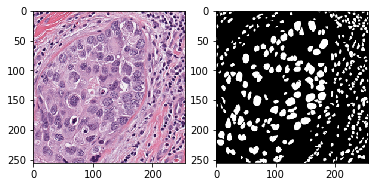

(256, 256, 3)   (256, 256)


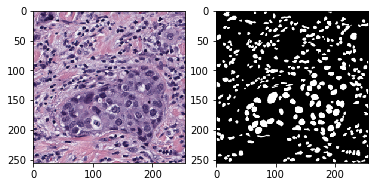

(256, 256, 3)   (256, 256)


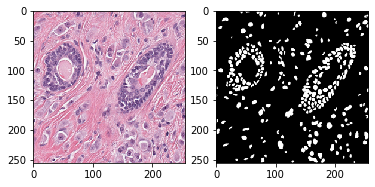

(256, 256, 3)   (256, 256)


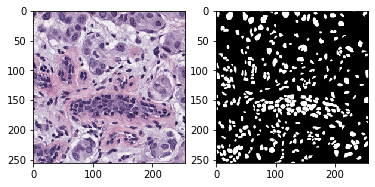

(256, 256, 3)   (256, 256)


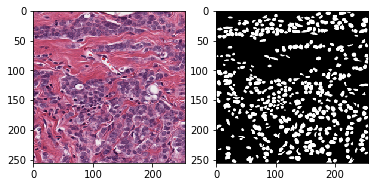

(256, 256, 3)   (256, 256)


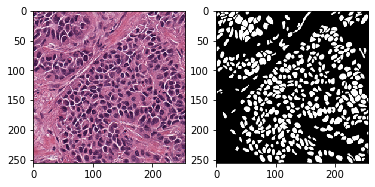

(256, 256, 3)   (256, 256)


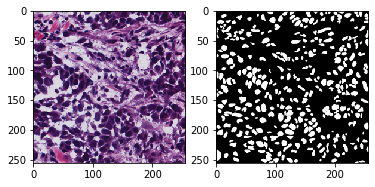

(256, 256, 3)   (256, 256)


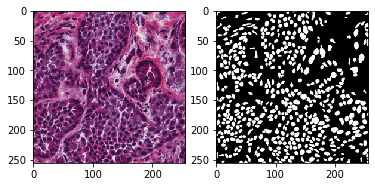

(256, 256, 3)   (256, 256)


In [44]:
c=0
for i in os.listdir('/content/gdrive/MyDrive/Kaggle/original-monuseg-data-unet-320-epoch/monuseg-2018-original/MoNuSegTestData/MoNuSegTestData/save/'):
  if i.endswith('xml'):
    c+=1
    save_datapoint(i,'/content/test_folder',str(c))

In [ ]:
command2="python Medical-Transformer/test.py \
--loaddirec \"{}\" \
--val_dataset \"{}\" \
--direc '{}' \
--batch_size 1 \
--modelname \"MedT\" \
--imgsize 128 \
--gray \"no\"".format('/content/train results/390/MedT.pth',test_DIR,test_rese_DIR)
!{command2}

In [ ]:
N=328

st=0

Fsc=[]

MIU=[]

PA=[]

bestfsc=0

bestmiu=0
bestpa=0
bestep=0

folder='/content/test folder/labelcol'
listinfo=os.listdir(folder)
listinfo

In [ ]:
from sklearn.metrics import jaccard_similarity_score,f1_score
f1,iou=[],[]
for i in listinfo:
        I = np.array(Image.open('/content/test folder/labelcol/'+i))
        I=np.where(I>=127,1,0)

        
        L = np.array(Image.open('/content/test_results/'+i))
        L=np.where(L>=127,1,0)
        y_true,y_pred = I.flatten(),L.flatten()
        f1.append(f1_score(y_true,y_pred))
        iou.append(jaccard_similarity_score(y_true,y_pred))

In [ ]:
np.mean(f1),np.mean(iou)

In [ ]:

count=0
fig, ax = plt.subplots(7,4,figsize=(30,60))

[axi.set_axis_off() for axi in ax.ravel()]
for index,k in enumerate(os.listdir('test_results')):
  
  i='test folder/img/'+k
  j='test_results/'+k
  img=Image.open(i)
  label=Image.open(j)
  # plt.subplot(7,4,count)
  ax[count // 4,count%4].imshow(img)
  count+=1
  # plt.subplot(7,4,count)
  ax[count // 4,count%4].imshow(label,cmap='gray')
  count+=1
plt.savefig('test_results.png')

In [ ]:
!easy_install smop --user

In [ ]:
!smop /content/Medical-Transformer/performancemetrics_monuseg.m --output perf.py